# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import normaltest
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind
from statsmodels.stats.weightstats import ztest

df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
# Your work here.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
temperature,130.0,98.249231,0.733183,96.3,97.8,98.3,98.7,100.8
heart_rate,130.0,73.761538,7.062077,57.0,69.0,74.0,79.0,89.0


In [4]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


### Question 1: Is the distribution of body temperatures normal?

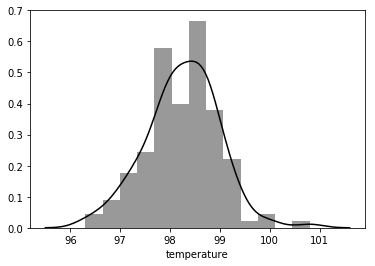

In [5]:
sns.distplot(df['temperature'], color='black')

In [6]:
# normal test
chi_square, p_val = normaltest(df['temperature'])

print('chi square stat:',chi_square)
print('p value =',p_val)

chi square stat: 2.703801433319203
p value = 0.2587479863488254


The p value is greater than 0.05 so the null hypothesis that data comes form a normal distribution cannot be rejected

### Answer to Question 1: 
Yes, the distribution of body temperature is normally distributed.

### Question 2: Is the sample size large? Are the observations independent?

In [7]:
df.groupby('gender').aggregate("count")

,temperature,heart_rate
gender,,
F,65,65
M,65,65


### Answer to Question 2:
Yes, the sample size is large (greater than 30), and observations seem to be independent.

### Question 3: Is the true population mean really 98.6 degrees F?

We will use one-sample t-test, becuase we are trying to determine if true observations have mean equal to population mean but we don't know the population variance and number of samples. 

In [8]:
# one-sample t-test
t_stat, t_p_val = ttest_1samp(df['temperature'], 98.6)

print('t statistic:',t_stat)
print('p value =',t_p_val)


t statistic: -5.4548232923645195
p value = 2.4106320415561276e-07


In [9]:
# one-sample z-test
z_stat, z_p_val = ztest(x1= df['temperature'], value = 98.6)

print('z statistic:',z_stat)
print('p value =',z_p_val)

z statistic: -5.4548232923645195
p value = 4.9021570141012155e-08


The null hypothesis that true population mean is 98.6 degrees F can be rejected because both t-test and z-test p values are low.

### Answer to Question 3: 
No, the true population mean is not 98.6 F degree.

### Question 4

In [10]:
sample = np.random.choice(df['temperature'], size=42)

In [13]:
print(ttest_1samp(sample, 98.6))
print(ztest(x1=sample, value=98.6))

Ttest_1sampResult(statistic=-2.225950578648694, pvalue=0.03157479353619229)
(-2.225950578648694, 0.02601749194751815)


### Answer to Question 4:


Both tests produced similar results and they are unable to reject the null hypothesis that the sub-sample mean is different from the population mean. 



### Question 5:  At what temperature should we consider someone's temperature to be "abnormal"?

In [14]:
# calculate 95% confidence interval
from scipy import stats
ci = stats.norm.interval(0.95, np.mean(df['temperature']), np.std(df['temperature']))

print('95% confidence interval:',ci)

95% confidence interval: (96.81775582674821, 99.68070571171329)


### Answer to Question 5:

We can consider temperature to be abnormal If it is below 96.81 or above 99.68. 

### Question 6: Is there a significant difference between males and females in normal temperature?

In [15]:
male = df[df['gender'] == 'M'].temperature
female = df[df['gender'] == 'F'].temperature

In [16]:
ttest_ind(male, female)

Ttest_indResult(statistic=-2.2854345381656103, pvalue=0.02393188312239561)

The null hypothesis that there is no difference between male and female temperatures can be rejected becuase p_value 0.023 is less than 0.05.

### Answer to Question 6: 

Yes, there is statistically significant difference between male and female body temperatures.

### Analysis Conclusion:

* True normal human body temperature differs from 98.6 degrees fahrenheit.

* The body temperature is considered "abnormal" if it is outside the range of 96.81-99.68.

* There is statistically significant difference between male and female body temperatures.